In [1]:
# https://keras.io/
#!pip install -q keras
#import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, Activation, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Concatenate
#from keras.optimizers import Adam
from tensorflow.keras.layers import Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Dense, Lambda
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras_preprocessing.image import ImageDataGenerator
from imgaug import augmenters as iaa
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Lambda, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping
import numpy as np

# # this part will prevent tensorflow to allocate all the avaliable GPU Memory
# # backend
# import tensorflow as tf
# from tensorflow.compat.v1.keras import backend as k

# # Don't pre-allocate memory; allocate as-needed
# config = tf.compat.v1.ConfigProto()
# config.gpu_options.allow_growth = True

# # Create a session with the above options specified.
# k.set_session(tf.compat.v1.Session(config=config))

In [2]:
def set_gpu():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Currently, memory growth needs to be the same across GPUs
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        except RuntimeError as e:
            print(e)

set_gpu()

1 Physical GPUs, 1 Logical GPUs


In [3]:
def space_to_depth_x2(x):
    import tensorflow as tf
    return tf.nn.space_to_depth(x,block_size=2)

def Network1():
    input = Input(shape=(64, 64, 3))

    layer1 = Conv2D(32, (3, 3), strides=(1, 1), padding='same', name='block1_conv1', use_bias=False)(input)
    layer1 = BatchNormalization(name='norm_1')(layer1)
    layer1 = Activation("relu")(layer1)

    layer2 = Conv2D(64, (3, 3), strides=(1, 1), padding='same', name='block1_conv2', use_bias=False)(layer1)
    layer2 = BatchNormalization(name='norm_2')(layer2)
    layer2 = Activation("relu")(layer2)

    layer3 = Conv2D(128, (3, 3), strides=(1, 1), padding='same', name='block1_conv3', use_bias=False)(layer2)
    layer3 = BatchNormalization(name='norm_3')(layer3)
    layer3 = Activation("relu")(layer3)

    layer4 = Conv2D(256, (3, 3), strides=(1, 1), padding='same', name='block1_conv4', use_bias=False)(layer3)
    layer4 = BatchNormalization(name='norm_4')(layer4)
    layer4 = Activation("relu")(layer4)

    layer5 = Conv2D(512, (3, 3), strides=(1, 1), padding='same', name='block1_conv5', use_bias=False)(layer4)
    layer5 = BatchNormalization(name='norm_5')(layer5)
    layer5 = Activation("relu")(layer5)

    layer6 = MaxPooling2D(pool_size=(2, 2), strides=2)(layer5)
    skip_connection_1 = layer6

    layer7 = Conv2D(64, (3, 3), strides=(1, 1), padding='same', name='block2_conv1', use_bias=False)(layer6)
    layer7 = BatchNormalization(name='norm_7')(layer7)
    layer7 = Activation("relu")(layer7)

    layer8 = Conv2D(128, (3, 3), strides=(1, 1), padding='same', name='block2_conv2', use_bias=False)(layer7)
    layer8 = BatchNormalization(name='norm_8')(layer8)
    layer8 = Activation("relu")(layer8)

    layer9 = Conv2D(256, (3, 3), strides=(1, 1), padding='same', name='block2_conv3', use_bias=False)(layer8)
    layer9 = BatchNormalization(name='norm_9')(layer9)
    layer9 = Activation("relu")(layer9)

    layer10 = Conv2D(512, (3, 3), strides=(1, 1), padding='same', name='block2_conv4', use_bias=False)(layer9)
    layer10 = BatchNormalization(name='norm_10')(layer10)
    layer10 = Activation("relu")(layer10)

    layer11 = Conv2D(1024, (3, 3), strides=(1, 1), padding='same', name='block2_conv5', use_bias=False)(layer10)
    layer11 = BatchNormalization(name='norm_11')(layer11)
    layer11 = Activation("relu")(layer11)

    layer12 = MaxPooling2D(pool_size=(2, 2), strides=2)(layer11)
    skip_connection_1 = Lambda(space_to_depth_x2)(skip_connection_1)
    layer13 = concatenate([skip_connection_1, layer12])
    skip_connection_2 = layer13

    layer14 = Conv2D(32, (3, 3), strides=(1, 1), padding='same', name='block3_conv1', use_bias=False)(layer13)
    layer14 = BatchNormalization(name='norm_14')(layer14)
    layer14 = Activation("relu")(layer14)

    layer15 = Conv2D(128, (3, 3), strides=(1, 1), padding='same', name='block3_conv2', use_bias=False)(layer14)
    layer15 = BatchNormalization(name='norm_15')(layer15)
    layer15 = Activation("relu")(layer15)

    layer16 = Conv2D(256, (3, 3), strides=(1, 1), padding='same', name='block3_conv3', use_bias=False)(layer15)
    layer16 = BatchNormalization(name='norm_16')(layer16)
    layer16 = Activation("relu")(layer16)

    layer17 = Conv2D(512, (3, 3), strides=(1, 1), padding='same', name='block3_conv4', use_bias=False)(layer16)
    layer17 = BatchNormalization(name='norm_17')(layer17)
    layer17 = Activation("relu")(layer17)

    layer18 = Conv2D(1024, (3, 3), strides=(1, 1), padding='same', name='block3_conv5', use_bias=False)(layer17)
    layer18 = BatchNormalization(name='norm_18')(layer18)
    layer18 = Activation("relu")(layer18)

    layer19 = MaxPooling2D(pool_size=(2, 2), strides=2)(layer18)
    skip_connection_2 = Lambda(space_to_depth_x2)(skip_connection_2)

    layer20 = concatenate([skip_connection_2, layer19])
    layer21 = Conv2D(200, (1, 1), name='block4_conv1', use_bias=False)(layer20)
    layer21 = BatchNormalization(name='norm_21')(layer21)

    layer22 = GlobalAveragePooling2D(data_format=None)(layer21)
    output = Activation('softmax')(layer22)

    model = Model(inputs=[input], outputs=[output])

    return model

In [4]:
model = Network1()
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

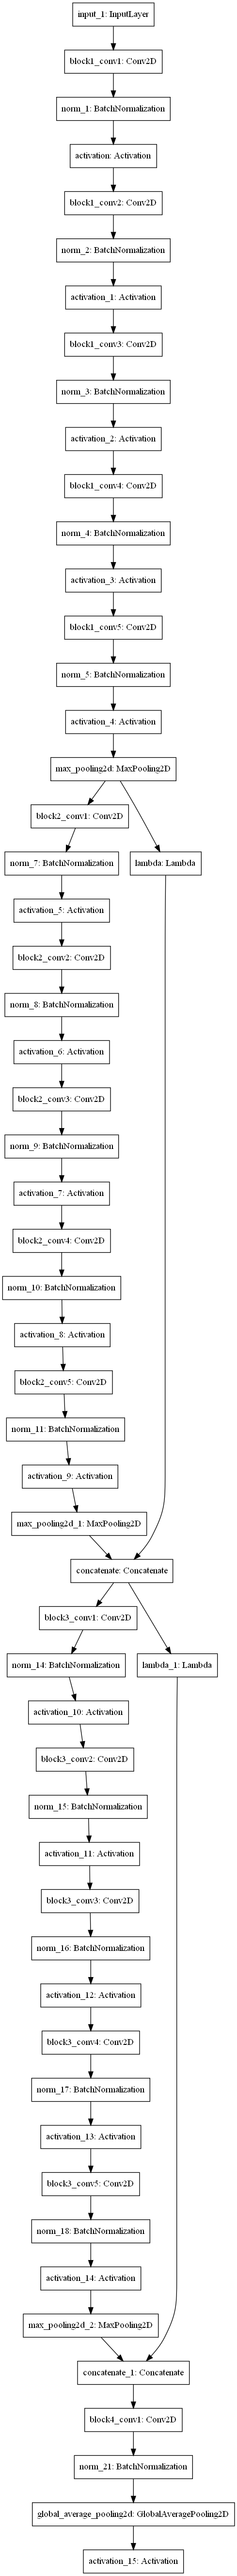

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='./model.png')

In [5]:
def Image_augmentation(network_num, val_annotations='./tiny-imagenet-200/val/val_annotations.txt', train_data_address='./tiny-imagenet-200/train/',
                       val_data_address='./tiny-imagenet-200/val/images/',batch_size = 64, use_data_aug= True):

    ''' convert val data from txt to dataframe '''
    val_data = pd.read_csv(val_annotations, sep='\t', header=None, names=['File', 'Class', 'X', 'Y', 'H', 'W'])
    val_data.drop(['X', 'Y', 'H', 'W'], axis=1, inplace=True)

    ''' use imgaug for augmentation '''
    if network_num == 1:
        # image_aug = iaa.SomeOf((0, 5), [iaa.Affine(scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}), iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05)),
        #                                    iaa.Affine(rotate=(-10, 10)), iaa.AdditiveGaussianNoise(scale=0.05 * 255), iaa.CropAndPad(percent=(-0.1, 0.1))])

        image_aug = iaa.SomeOf((0, None), [iaa.Affine(scale=(0.5, 1.5)), iaa.Affine(rotate=20),
    iaa.CoarseDropout((0.0, 0.2), size_percent=(0.05, 0.07)), iaa.AdditiveGaussianNoise(scale=0.05*255), iaa.CropAndPad(percent=(-0.25, 0.25))
     ])                                          
    elif network_num == 2:
        image_aug = iaa.SomeOf(10, [iaa.Fliplr(0.5), iaa.Flipud(0.5), iaa.GaussianBlur(sigma=(0.0, 3.0)), iaa.CropAndPad(percent=(-0.1, 0.1)),
                                    iaa.Affine(scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}), iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}),
                                    iaa.Affine(rotate=(-10, 10)), iaa.Affine(shear=(-10, 10)), iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05)), iaa.Multiply((0.5, 1.5))])

    ''' load data '''
    if use_data_aug:
        train_datagen = ImageDataGenerator(preprocessing_function=image_aug.augment_image, rescale=1. / 255)
    else:
        train_datagen = ImageDataGenerator(rescale=1. / 255)
    valid_datagen = ImageDataGenerator(rescale=1. / 255)


    train_generator = train_datagen.flow_from_directory( train_data_address, target_size=(32, 32), color_mode='rgb', 
                                                    batch_size=batch_size, class_mode='categorical', shuffle=True, seed=42)
    validation_generator = valid_datagen.flow_from_dataframe(val_data, directory=val_data_address, x_col='File', y_col='Class', target_size=(64, 64),
                                                    color_mode='rgb', class_mode='categorical', batch_size=batch_size, shuffle=True, seed=42)

    return train_generator, validation_generator

In [6]:
train_generator, validation_generator = Image_augmentation(1, val_annotations="./data/tiny-imagenet-200/val/val_annotations.txt", train_data_address='./data/tiny-imagenet-200/train/',
                       val_data_address='./data/tiny-imagenet-200/val/images/', batch_size = 128, use_data_aug= False)

Found 100000 images belonging to 200 classes.
Found 10000 validated image filenames belonging to 200 classes.


In [15]:
acc_all = []
val_acc_all = []
loss_all = []
val_loss_all = []

with tf.device('/gpu:0'):
    for i in range(10):
        model = load_model('./best_model/model{}.h5'.format(i))
        history = model.fit(train_generator, epochs=10, steps_per_epoch=400, validation_steps=150, validation_data=validation_generator, verbose=1, callbacks=[lr_reducer])
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']

        loss = history.history['loss']
        val_loss = history.history['val_loss']
        acc_all.append(acc)
        val_acc_all.append(val_acc)
        loss_all.append(loss)
        val_loss_all.append(val_loss)
        
        model.save('./best_model/model{}.h5'.format(i+1)) 


Epoch 1/10
400/400 [==============================] - 110s 275ms/step - loss: 3.0278 - accuracy: 0.3117 - val_loss: 3.9729 - val_accuracy: 0.1543
Epoch 2/10
400/400 [==============================] - 117s 292ms/step - loss: 2.9294 - accuracy: 0.3337 - val_loss: 4.4352 - val_accuracy: 0.0942
Epoch 3/10
400/400 [==============================] - 118s 295ms/step - loss: 2.8362 - accuracy: 0.3556 - val_loss: 4.3051 - val_accuracy: 0.1125
Epoch 4/10
400/400 [==============================] - 114s 286ms/step - loss: 2.7536 - accuracy: 0.3678 - val_loss: 3.9833 - val_accuracy: 0.1594
Epoch 5/10
400/400 [==============================] - 113s 282ms/step - loss: 2.6591 - accuracy: 0.3845 - val_loss: 3.7265 - val_accuracy: 0.1928
Epoch 6/10
400/400 [==============================] - 113s 282ms/step - loss: 2.6050 - accuracy: 0.3962 - val_loss: 4.0024 - val_accuracy: 0.1497
Epoch 7/10
400/400 [==============================] - 114s 286ms/step - loss: 2.5189 - accuracy: 0.4119 - val_loss: 3.8685 -

400/400 [==============================] - 116s 290ms/step - loss: 0.1338 - accuracy: 0.9800 - val_loss: 3.6783 - val_accuracy: 0.2367
Epoch 8/10
400/400 [==============================] - 117s 291ms/step - loss: 0.1259 - accuracy: 0.9819 - val_loss: 3.9416 - val_accuracy: 0.2047
Epoch 9/10
400/400 [==============================] - 117s 293ms/step - loss: 0.1345 - accuracy: 0.9788 - val_loss: 3.7536 - val_accuracy: 0.2265
Epoch 10/10
400/400 [==============================] - 117s 292ms/step - loss: 0.1216 - accuracy: 0.9825 - val_loss: 3.8253 - val_accuracy: 0.2172
Epoch 1/10
400/400 [==============================] - 118s 295ms/step - loss: 0.1131 - accuracy: 0.9838 - val_loss: 3.7563 - val_accuracy: 0.2197
Epoch 2/10
400/400 [==============================] - 118s 295ms/step - loss: 0.1099 - accuracy: 0.9840 - val_loss: 3.5306 - val_accuracy: 0.2573
Epoch 3/10
400/400 [==============================] - 119s 297ms/step - loss: 0.1025 - accuracy: 0.9850 - val_loss: 3.7340 - val_accur

In [10]:
model.save('./best_model/model0.h5') 

In [13]:
val_acc

[0.1432291716337204]